# 各类排序算法性能对比

### 排序算法复杂度整理

| 排序算法 | English | 时 间 复 杂 度 | 空 间 复 杂 度 |
| :---: | :---: | :---: | :---: |
| 冒泡排序 | BubbleSort | $O(n^2)$        | $O(1)$          |
| 选择排序 | SelectSort | $O(n^2)$        | $O(1)$          |
| 插入排序 | InsertSort | $O(n^2)$        | $O(1)$          |
| 希尔排序 | ShellSort  | $O(n^{1.5})$       | $O(1)$          |
| 快速排序 | QuickSort  | $O(Nlog_2N)$ | $O(Nlog_2N)$ |
| 归并排序 | MergeSort  | $O(Nlog_2N)$ | $O(1)$          |
| 堆排序   | HeapSort   | $O(Nlog_2N)$ | $O(1)$          |

### 初始化

In [1]:
import random
import copy, time
from sort import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 生成随机数
NumNumbers = 300
RandomNumbers = [random.uniform(0,10) for x in range(0,NumNumbers,1)]

# 待测试排序算法
SortFunc = [BubbleSort,SelectSort,InsertSort,QuickSort,ShellSort,MergeSort,HeapSort]

### 基本排序测试

In [2]:
RandList = copy.copy(RandomNumbers)
StdList = SortStd(RandList)

RandList = copy.copy(RandomNumbers)
for cSort in SortFunc:
    SortTest(cSort, RandList, StdList)

[Function SortStd] Time Duration: 0.000s
[Class   BubbleSort]: Time Duration:  0.045s, Check: True SwapCount =      21228, SearchCount =      89700
[Class   SelectSort]: Time Duration:  0.017s, Check: True SwapCount =        292, SearchCount =      44850
[Class   InsertSort]: Time Duration:  0.010s, Check: True SwapCount =          0, SearchCount =      21527
[Class    QuickSort]: Time Duration:  0.001s, Check: True SwapCount =        784, SearchCount =       2511
[Class    ShellSort]: Time Duration:  0.003s, Check: True SwapCount =          0, SearchCount =       3694
[Class    MergeSort]: Time Duration:  0.001s, Check: True SwapCount =          0, SearchCount =       2390
[Class     HeapSort]: Time Duration:  0.021s, Check: True SwapCount =       2172, SearchCount =      24369


### MonteCarlo测试

***创建测试函数***

In [3]:
def SortTestRep(cSortList, NumLen = 100, Times = 10):
    # init
    keys = ['Swap','Search','Time']
    keysAvg = ['AvgSwap','AvgSearch','AvgTime']
    TestResult = {}
    for cSort in cSortList:
        TestResult[cSort.__name__] = dict.fromkeys(keys+keysAvg)
        for key, keyAvg in zip(keys, keysAvg):
            TestResult[cSort.__name__][key] = []
            TestResult[cSort.__name__][keyAvg] = 0
    
    # run tests
    for i in range(Times):
        RandomNumbers = [random.uniform(0,10) for x in range(0,NumLen,1)]
        for cSort in cSortList:
            result = SortTest(cSort, RandomNumbers, PrintFlag=False)
            for key in keys:
                TestResult[cSort.__name__][key].append(result[key])
    
    # analyse
    for cSort in cSortList:
        for key, keyAvg in zip(keys, keysAvg):
            TestResult[cSort.__name__][keyAvg] = sum(TestResult[cSort.__name__][key])/Times
    
    return TestResult

***测试算法***

In [4]:
# run test (cost a period of time, suggest run once)
TestResult = SortTestRep(SortFunc, NumLen = 1000, Times = 10)

In [6]:
# using pandas to analyse
dfTest = pd.DataFrame(TestResult).T
keysToAnalyse = ['AvgSearch','AvgSwap','AvgTime']
dfTestToPrint = dfTest.loc[:,keysToAnalyse]
print(dfTestToPrint)

           AvgSearch AvgSwap     AvgTime
BubbleSort    999000  250057    0.506937
SelectSort    499500   991.2    0.193917
InsertSort    251056       0    0.124811
QuickSort    10665.5  3080.5  0.00700047
ShellSort      15746       0   0.0135011
MergeSort     9701.4       0  0.00630052
HeapSort      258028  9033.6    0.222617


***作图分析***

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


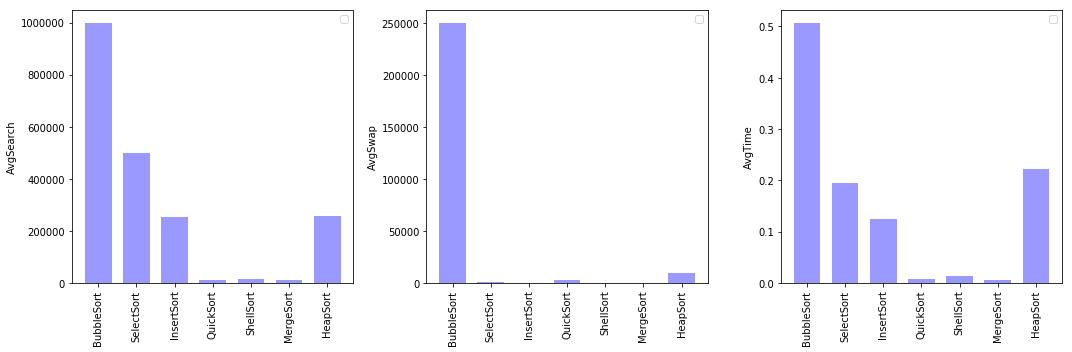

In [7]:
# parameters
NumAnalyse = len(keysToAnalyse)
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)
bar_width = 0.7
opacity = 0.4

# bar plots
for i,key in zip(range(NumAnalyse),keysToAnalyse):
    data = dfTest.loc[:,key]
    ax = fig.add_subplot(1,NumAnalyse,i+1)
    index = np.arange(len(data))
    rects = plt.bar(index, data, bar_width,
                     alpha=opacity,
                     color='b')
    plt.ylabel(key)
    plt.xticks(index, dfTest.index, rotation=90)
    plt.legend()
    plt.tight_layout()
plt.show()